<a href="https://colab.research.google.com/github/MatLock/UdeSa-Applied-Math-and-Optimization/blob/main/clase_03/clase_03_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probemos buscar el mínimo de la función

$$ f(x, y) = \frac{1}{2} (a x^2 + b y^2) $$

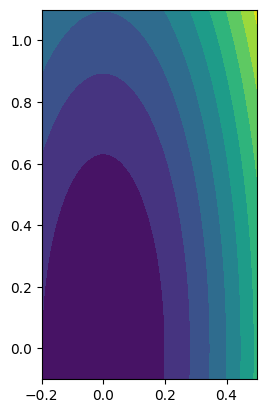

In [ ]:
from pylab import *
import copy

def test_fn(r, a, b):
  return 0.5*(a*r[0]**2 + b*r[1]**2)

def grad(r, a, b):
  return [a*r[0], b*r[1]]

aa = 1.0
bb = 0.1
xx = np.linspace(-2*bb, 0.5, num=100)
yy = np.linspace(-bb, 1 + bb, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
rr = np.array([[(x, y) for x in xx] for y in yy])
contourf(X, Y, test_fn([X, Y], aa, bb), levels=10)
gca().set_aspect('equal')

Realizamos el proceso iterativo

$$ \mathbf{x}_{k+1} = \mathbf{x}_k - s \nabla f (\mathbf{x}_k) $$

In [ ]:
Nsteps = 30
step = 2.0/(1+bb)  # Elegido con el criterio de exact line search
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0] = bb
yk[0] = 1.0
fk[0] = test_fn((bb, 1.0), aa, bb)

for ii in range(Nsteps):
  xk[ii+1] = xk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[0]
  yk[ii+1] = yk[ii] - step*grad((xk[ii], yk[ii]), aa, bb)[1]
  fk[ii+1] = test_fn((xk[ii+1], yk[ii+1]), aa, bb)

x_gd = copy.copy(xk)
y_gd = copy.copy(yk)

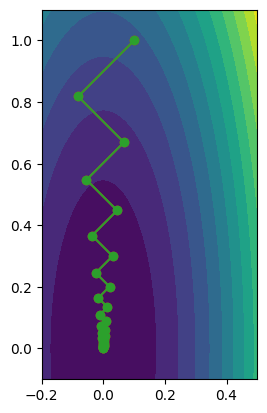

In [ ]:
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(xk, yk, color='C3', marker='o')
plot(x_gd, y_gd, color='C2', marker='o')
gca().set_aspect('equal')

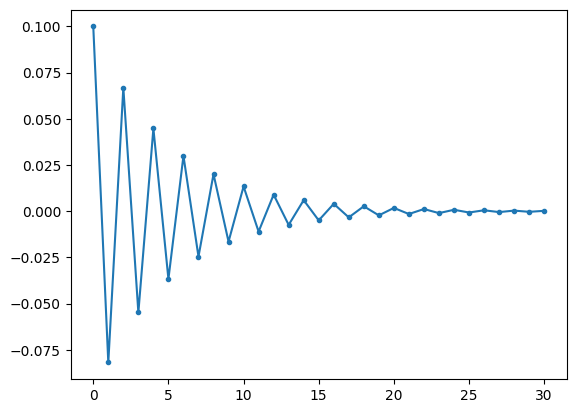

In [ ]:
plot(xk, marker='.')

## Variante con momentum

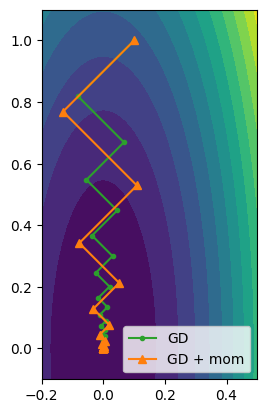

In [ ]:
Nsteps = 30
step = (2.0/(1+np.sqrt(bb)))**2
beta = ((1-np.sqrt(bb))/(1+np.sqrt(bb)))**2
xk = np.zeros(Nsteps+1)
wk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
zk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0] = bb
yk[0] = 1.0

wk[0] = grad((xk[0], yk[0]), aa, bb)[0]
zk[0] = grad((xk[0], yk[0]), aa, bb)[1]

fk[0] = test_fn((bb, 1.0), aa, bb)

for ii in range(Nsteps):
  xk[ii+1] = xk[ii] - step*wk[ii]
  yk[ii+1] = yk[ii] - step*zk[ii]

  wk[ii+1] = grad((xk[ii+1], yk[ii+1]), aa, bb)[0] + beta*wk[ii]
  zk[ii+1] = grad((xk[ii+1], yk[ii+1]), aa, bb)[1] + beta*zk[ii]

  fk[ii+1] = test_fn((xk[ii+1], yk[ii+1]), aa, bb)

x_mom = copy.copy(xk)
y_mom = copy.copy(yk)
contourf(X, Y, test_fn([X, Y], aa, bb), levels=15)
plot(x_gd, y_gd, color='C2', marker='.', label='GD')
plot(x_mom, y_mom, color='C1', marker='^', label='GD + mom')
legend()
gca().set_aspect('equal')

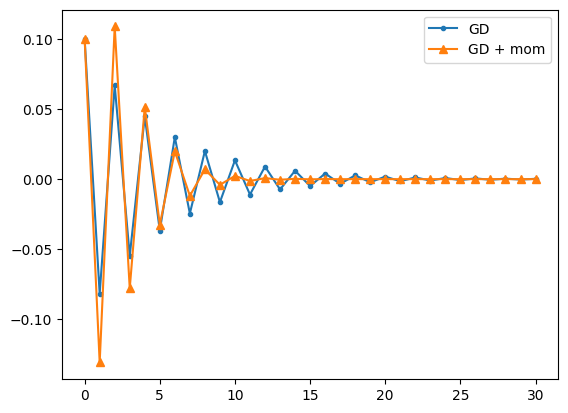

In [ ]:
plot(x_gd, color='C0', marker='.', label='GD')
plot(x_mom, color='C1', marker='^', label='GD + mom')
legend()

## Un mejor ejemplo de SGD

(100, 2)


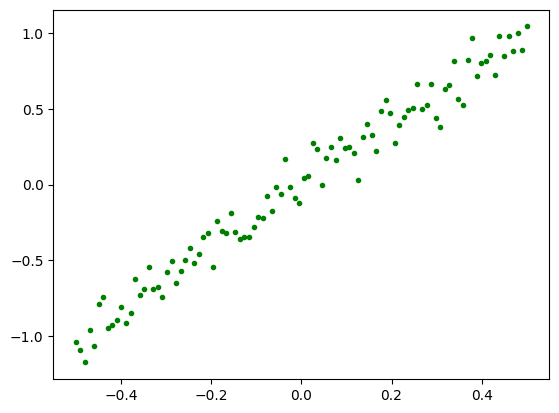

In [ ]:
# Generación de datos
N = 100
data = [(x, 2*x+ np.random.normal(0.0, 0.1) + 1.0) for x in linspace(7,8,num=N)]
data = np.array(data)
#plot(data[:, 0], data[:, 1], 'b.')
data = data - data.mean(axis=0)
plot(data[:, 0], data[:, 1], 'g.')
print(shape(data))

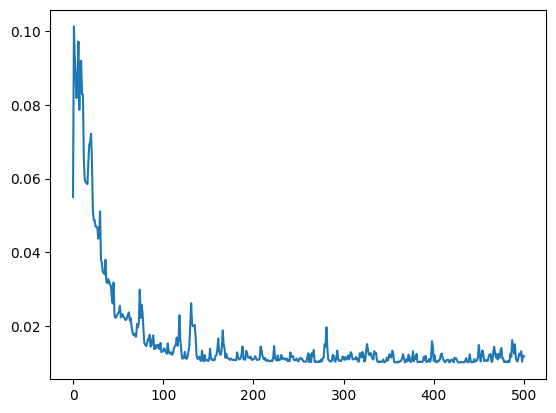

In [ ]:
def lineal(x, a, b):
  return a*x + b

def error(yi, x, a, b):
  return (yi - lineal(x,a,b))**2

def grad(yi, x, a, b):
  fact = 2*(yi - lineal(x,a,b))
  da = -x
  db = -1.0
  return [fact*da, fact*db]


Nsteps = 500
step = 0.1
ak = np.zeros(Nsteps+1)
bk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

ak[0] = 1.0
bk[0] = 0.0
fk[0] = test_fn((bb, 1.0), aa, bb)

for ii in range(Nsteps):
  idx   = np.random.choice(N)
  point = data[idx]
  geval    = grad(point[1], point[0], ak[ii], bk[ii])
  ak[ii+1] = ak[ii] - step*geval[0]
  bk[ii+1] = bk[ii] - step*geval[1]
  fk[ii+1] = np.mean(error(data[:, 1], data[:, 0], ak[ii+1], bk[ii+1]))

plot(fk)

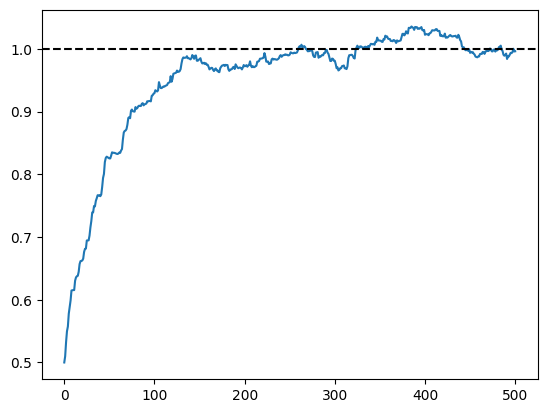

In [ ]:
plot(ak/2.0)
axhline(1.0, color='k', ls='--')

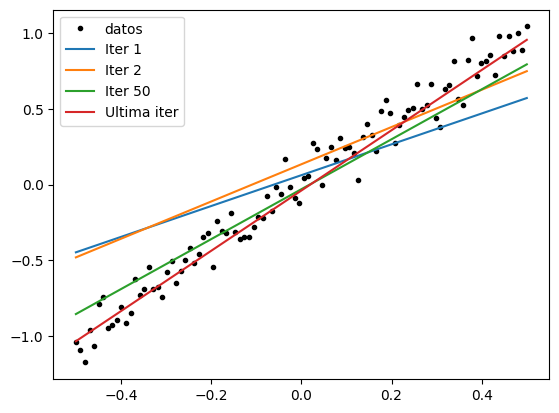

In [ ]:
plot(data[:, 0], data[:, 1], 'k.', label='datos')
plot(data[:, 0], lineal(data[:, 0], ak[1], bk[1]), label='Iter 1')
plot(data[:, 0], lineal(data[:, 0], ak[10], bk[10]), label='Iter 2')
plot(data[:, 0], lineal(data[:, 0], ak[50], bk[50]), label='Iter 50')
plot(data[:, 0], lineal(data[:, 0], ak[-1], bk[-1]), label='Ultima iter')
legend()

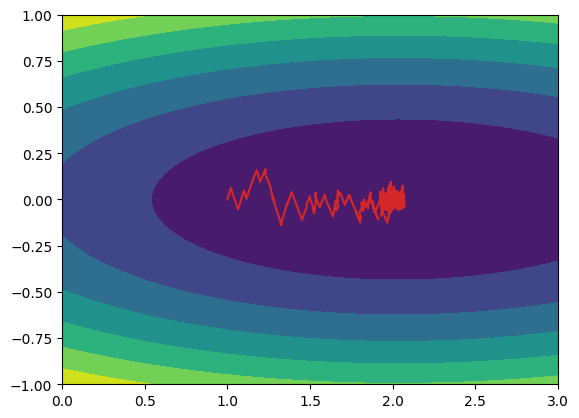

In [ ]:
asp = linspace(0, 3)
bsp = linspace(-1, 1)
errs = np.array([[np.mean(error(data[:, 1], data[:, 0], aa, bb)) for aa in asp] for bb in bsp])
contourf(asp, bsp, errs)
plot(ak, bk, color='C3')

Newton for $$ f(x, y) = \frac{1}{2} (a x^2 + b y^2) $$

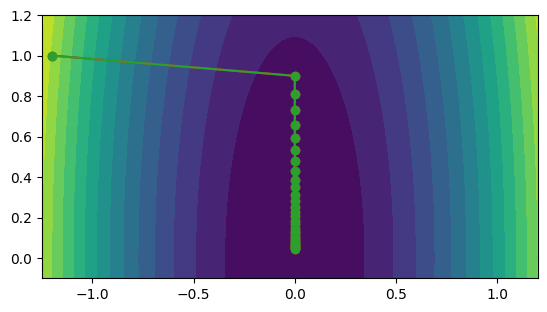

In [24]:
from pylab import *
import copy

def f(r, a, b):
  return 0.5*(a*r[0]**2 + b*r[1]**2)

def grad_f(r, a, b):
  return [a*r[0], b*r[1]]

def hessian(r, a, b):
  elem_1_1 = a
  elem_1_2 = 0
  elem_2_1 = 0
  elem_2_2 = b
  return np.array([[elem_1_1, elem_1_2], [elem_2_1, elem_2_2]])

def newton_backtracking(point, a, b, alpha_init, beta = 0.5,c = 0.25):
  f_x = f(point, a, b)
  f_gradient = grad_f(point, a, b)
  f_hessian = - np.linalg.inv(hessian(point, a, b))
  tmp = alpha_init
  p_k = np.linalg.solve(f_hessian, f_gradient)

  while f(point - tmp * f_gradient, a, b) > f(point - tmp * p_k ,a, b):
    tmp = beta * tmp
  return tmp



Nsteps = 30
step = 1  # alpha
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)
aa = 1.0
bb = 0.1
xk[0] = -1.2
yk[0] = 1
fk[0] = f((-1.2, 1), aa, bb)

for ii in range(Nsteps):
  step = newton_backtracking(np.array([xk[ii], yk[ii]]), aa, bb, step)
  xk[ii+1] = xk[ii] - step*grad_f(np.array((xk[ii], yk[ii])), aa, bb)[0]
  yk[ii+1] = yk[ii] - step*grad_f(np.array((xk[ii], yk[ii])), aa, bb)[1]
  fk[ii+1] = f((xk[ii+1], yk[ii+1]), aa, bb)

x_gd = copy.copy(xk)
y_gd = copy.copy(yk)

xx = np.linspace(-1.25, 1.2, num=100)
yy = np.linspace(-0.1, 1.2, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')

contourf(X, Y, f([X, Y], aa, bb), levels=15)
plot(xk, yk, color='C3', marker='o')
plot(x_gd, y_gd, color='C2', marker='o')
gca().set_aspect('equal')

##back tracking + line direct search for

$$ f(x, y) = 100(y + x^2)^2 + (1 - x)^2 $$

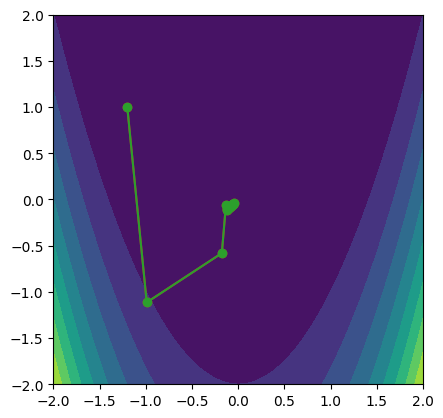

In [2]:
import numpy as np
import copy
from pylab import *


def rosenbrock(point):
  x = point[0]
  y = point[1]
  return 100 * (y-x**2)**2 + (1 - x)**2

def gradient(point):
  x = point[0]
  y = point[1]
  df_dx = -400 * x * (y - x**2) - 2 * (1 - x)
  df_dy = 200 * (y - x**2)
  return np.array([df_dx, df_dy])

def hessian(point):
  x = point[0]
  y = point[1]
  elem_1_1 = 1200 * x**2 - 400 * y + 2
  elem_1_2 = -400 * x
  elem_2_1 = -400 * x
  elem_2_2 = 200
  return np.array([[elem_1_1, elem_1_2], [elem_2_1, elem_2_2]])

def max_eigen_value(point):
  x = point[0]
  y = point[1]
  return np.max(np.linalg.eigvals(hessian(x,y)))

#Wolfe/Armijo
def armijo_linear_search(point, alpha_init, beta = 0.5,c = 0.25):
  f_x = rosenbrock(point)
  f_gradient = gradient(point)
  alpha = alpha_init

  while rosenbrock(point + alpha * -f_gradient) > f_x - c * alpha * np.dot(f_gradient, f_gradient):
    alpha = beta * alpha
  return alpha

def backtracking_linear_search(point, alpha_init, beta= 0.5, c = 0.25):
  tmp = alpha_init
  gradient_value = gradient(point)
  while rosenbrock(point - tmp * gradient_value) > rosenbrock(point) - tmp * c * np.linalg.norm(gradient_value)**2:
    tmp = beta * tmp
  return tmp


Nsteps = 20
step = 1.0 #alpha
xk = np.zeros(Nsteps+1)
yk = np.zeros(Nsteps+1)
fk = np.zeros(Nsteps+1)

xk[0] = -1.2
yk[0] = 1
fk[0] = rosenbrock(np.array([-1.2, 1]))

for ii in range(Nsteps):
  step = backtracking_linear_search([xk[ii], yk[ii]], step)
  xk[ii+1] = xk[ii] - step*gradient([xk[ii], yk[ii]])[0]
  yk[ii+1] = xk[ii] - step*gradient([xk[ii], yk[ii]])[1]
  fk[ii+1] = rosenbrock([xk[ii+1], yk[ii+1]])

xx = np.linspace(-2, 2, num=100)
yy = np.linspace(-2, 2, num=200)
X, Y = np.meshgrid(xx, yy, indexing='ij')
contourf(X, Y, rosenbrock([X, Y]), levels=10)
plot(xk, yk, color='C3', marker='o')
plot(xk, yk, color='C2', marker='o')
gca().set_aspect('equal')





In [ ]:
plot(xk, marker='.')